\newcommand{\dd}{\text{d}}


## Objectif

En physique-chimie, de nombreux phénomènes sont décrits par des équations différentielles, qu’il s’agisse de la chute d’un objet, du comportement d’un circuit électrique ou de l'évolution des concentrations en fonction du temps. Ces équations expriment comment une grandeur évolue selon une variable, il s'agit souvent d'une variable temporelle, mais pas toujours.
Cependant, il est souvent impossible d’obtenir une solution analytique exacte pour ces équations, en particulier lorsqu'elles sont non linéaires ou qu’elles dépendent de plusieurs variables. C’est là qu’intervient la méthode d’Euler, c'est l’une des méthodes numériques les plus simples pour 
obtenir une solution approchée.

## Principe de la méthode

L'idée fondamentale de la méthode d'Euler est d'approximer la dérivée $\frac{\text{d}y}{\text{d}t}$ par son taux d'accroissement sur l'intervalle $[t,t+\text{d} t]$.

$$ 
  \frac{\text{d}y}{\text{d}t} \simeq 
  \frac{
      y(t+\text{d} t) - y(t)
  }{
      \dd t
  }
$$

Autrement dit, cela revient à effectuer un développement limité au premier ordre de $y(t+\text{d} t)$ :

$$
    y(t+\text{d} t)
   \simeq  y(t)+
      \dd t \frac{\text{d}y}{\text{d}t}
$$

La première étape est de discrétiser le domaine continu de résolution, il correspond au temps, à une direction (une position, une altitude, ...), ou toute autre variable ...
Dans la suite on note $t$ la variable, mais il ne faut pas oublier son sens plus large.

Pour cela, on le divise en un ensemble discret de points afin de rendre le problème soluble par des techniques de calcul numérique.
Lors de cette étape, on remplace les fonctions continues par des approximations basées sur les valeurs des variables à des points spécifiques.

On définit un pas de temps $\mathrm{d}t$ et 
cela donne la suite de nombres $(t_n)$ telle que :

$$
	t_n = n \cdot\dd t\quad\forall n\in\mathbb{N}
$$
De même toutes les fonctions et en particulier celle que l'on cherche seront aussi discrétisées.
La fonction recherchée $y(t)$ sera alors approximée par une suite $(y_n)$ :
$$
y_n  = y( n\cdot \mathrm{d}t)
\quad
\forall
n\in\mathbb{N}
$$

Le temps et la fonction recherchée ne sont donc plus des grandeurs **continues** mais des grandeurs **discrètes**.
Dans la suite, on note $t_i = i\dd t$ et $X_i=X(t_i)=X(i\dd t)$.

## Implémentation en python

Cela est particulièrement simple à mettre en place informatiquement car cela revient à manipuler des tableaux de données.
En python le type \texttt{list}  peut être utilisés de cette manière et interprétés comme des suites.

Le but est alors de remplir petit à petit les listes contenant la variable temporelle et la fonction recherchée
en utilisant une boucle `for` ou  `while`.

Avec une boucle `while` :

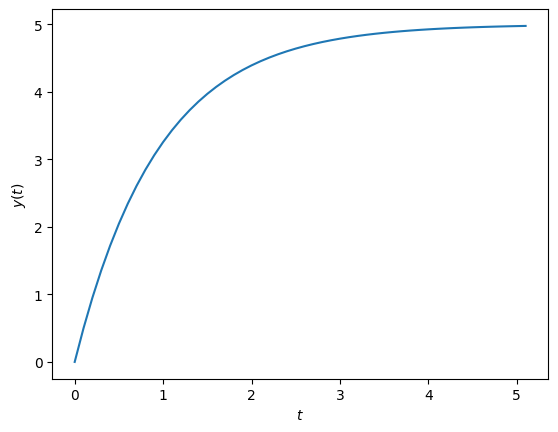

In [2]:
import matplotlib.pyplot as plt
tau = 1
dt = 0.1
yf = 5
t = [0]
y = [0] # Condition initiale

while t[-1]<5*tau:
    t.append( t[-1]+dt )
    y.append( y[-1]+dt*(yf-y[-1]) )
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.plot( t, y )

## Influence du pas d'intégration

```{shinylive-python}
#| standalone: true
#| viewerHeight: 500
from shiny import App, render, ui
import numpy as np
import matplotlib.pyplot as plt

app_ui = ui.page_fluid(
        ui.input_text("dt", "dt = ", "0.1") ,
        ui.output_plot("plot"),
)

def solve( dt ):
    t_liste = [0]
    U_liste = [0]

    tmax = 5
    while t_liste[-1] < tmax :
        t_liste.append( t_liste[-1]+dt )
        U_liste.append( U_liste[-1]+dt*(5-U_liste[-1]) )

    return t_liste, U_liste

def server(input, output, session):
    t_exact = np.linspace( 0, 5, 101)
    
    @output
    @render.plot(alt="Sine wave")
    def plot():
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_xlim([0, 5])
        ax2.set_xlim([0, 5])
        ax1.set_ylim([0, 7])

        try:
            dt_str = input.dt()
            dt_str = dt_str.replace(',','.')
            dt = float( dt_str )
            t, uc = solve( dt )
            ax1.plot(t, uc, '+')
            ax1.plot(t, uc, 'C0', lw=0.7)

            t_erreur = np.array( t )
            erreur = 100*np.abs( np.array( uc ) - 5*(1-np.exp(-t_erreur)))/(5*(1-np.exp(-t_erreur)))

            ax2.plot(t_erreur, erreur, c='C1', marker='+', ls='')
            ax2.plot(t_erreur, erreur, c='C1', lw=0.7)
        
        except:
            pass
        ax1.set_xlabel('$t$')
        ax1.set_ylabel('$u_c(t)$')
        ax2.set_xlabel('$t$')
        ax2.set_ylabel('erreur [%]')
        
        ax1.plot(t_exact, 5*(1-np.exp(-t_exact)), 'k--', label='')
        ax1.grid()


app = App(app_ui, server)
```

## Pour aller plus loin

La méthode présentée ici consiste à déterminer la solution à $t + \Delta t$ en fonction de la valeur de la fonction en $t$. 
C'est ce que l'on appelle la méthode explicite.